In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# import glob
from bs4 import BeautifulSoup

In [ ]:
# glob.glob('filled/*')

In [32]:
def faire_graph(soupe:BeautifulSoup):
    df=pd.DataFrame([element for sousliste in [tag['who'].split(' ') for tag in soupe.find_all() if tag.has_attr('who')] for element in sousliste][6:], columns = ['pers'])

    unique_pers = list(df.pers.unique())

    plt.scatter(
        range(1,len(df)+1), 
        df.pers, 
        marker = "o", 
        c=df.pers.apply(lambda x: unique_pers.index(x)).to_list(), 
        cmap='Set1',
        zorder=2
    )

    plt.plot(
        range(1,len(df)+1), 
        df.pers, 
        linewidth=1,
        zorder=1
    )
    
    plt.xticks(range(1,len(df)+1), range(1,len(df)+1))
    plt.title(soupe.find('title', attrs={"type": "sub"}).contents[0].strip())
    plt.xlabel('Interventions')
    plt.ylabel('Conseiller')
    plt.show()

c:\Users\pierr\.conda\envs\justal\lib\site-packages\bs4\builder\__init__.py:545: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  warnings.warn(


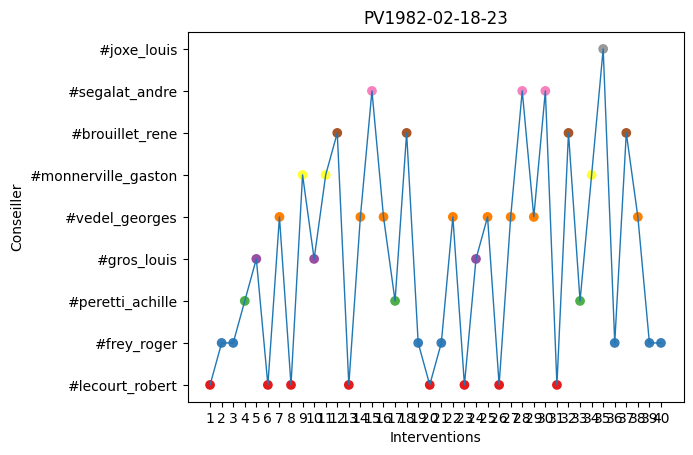

In [33]:
with open('filled/PV1982-02-18-23.xml', encoding='utf-8') as f:
    texte = f.read()

soup = BeautifulSoup(texte)

faire_graph(soup)